# 实际黄金价格与通胀波动率

大家都说黄金能够抗通胀，但实际在2008年金融危机以后通胀率大幅下行的时候黄金却迎来了大牛市，一方面有全球货币宽松的原因，但**黄金其实应该与通胀的波动率正相关**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from WindPy import w
%matplotlib inline

In [42]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [43]:
codes = 'G0000031'

In [44]:
data = w.edb(codes, '1968-01-02', datetime.date.today())

In [45]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['CPI mom'])

In [46]:
df[u'实际美元价格'] = (1 + df['CPI mom']/100).cumprod()

In [47]:
codes = 'S0031645'

In [48]:
data = w.edb(codes, '1968-01-02', datetime.date.today())

In [49]:
gold = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[u'伦敦金价'])

In [50]:
df = df.merge(gold, left_index=True, right_index=True)

In [51]:
df = df.fillna(method='ffill')

In [52]:
df[u'实际黄金价格'] = df[u'伦敦金价'] / df[u'实际美元价格']

In [65]:
df[u'实际黄金价格'] = df[u'实际黄金价格'] / df[u'实际黄金价格'][0] * 100

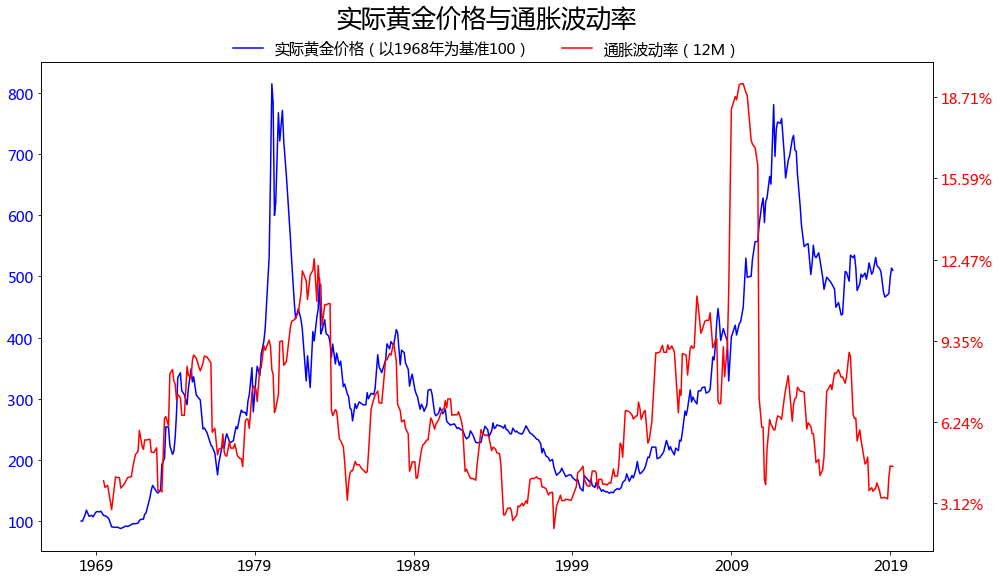

In [76]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot(df[u'实际黄金价格'], color='blue', label=u'实际黄金价格（以1968年为基准100）')
axx = ax.twinx()
lns2 = axx.plot(df[u'实际美元价格'].pct_change().rolling(12).std(), color='red', label=u'通胀波动率（12M）')

# Legend
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.07))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.2f}%'.format(x*np.sqrt(243)*100) for x in vals], color='red')


# Title
_ = ax.set_title(u'实际黄金价格与通胀波动率', fontsize=25, y=1.06)
fig.savefig(u'../pic/实际黄金价格与通胀波动率.jpg', format='jpg', dpi=200, bbox_inches='tight')